<a href="https://colab.research.google.com/github/superkay13/AMBAR_ML/blob/main/Copia_de_prueba_2_ambar_flores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# Paso 1: Cargar los datos
df = pd.read_csv('/content/Base_datos_version4_015092024_2.csv')

In [4]:
df

,Familia,Genero,Especie,Nombre completo,Unnamed: 4,100_A.,100_B.,102_B.,201_A.,201_B.,...,330_A.,331_A.,332_A.,400_A.,401_B.,403_A.,411_A.,500_A.,501_A.,502_A.
0,Arecaceae,Acrocomia,aculeata,Acrocomia aculeata,Acrocomia aculeata,unisexual,bisexual,Superior,present,one to five (1-5),...,whorled,one (1),trimerous,whorled,three (3),fused (>5%),one (1),absent,NaN,NaN
1,Cannabaceae,Ampelocera,hottlei,Ampelocera hottlei,Ampelocera hottlei,unisexual,bisexual,NaN,present,one to five (1-5),...,whorled,NaN,NaN,NaN,NaN,fused (>5%),NaN,absent,NaN,NaN
2,Bignoniaceae,Amphilophium,paniculatum,Amphilophium paniculatum,Amphilophium paniculatum,bisexual,bisexual,Superior,present,more than ten (>10),...,whorled,one (1),tetramerous,whorled,two (2),fused (>5%),three or more (>2),present,discoidal,NaN
3,Fabaceae,Andira,galeottiana,Andira galeottiana,Andira galeottiana,bisexual,bisexual,superior,present,one to five (1-5),...,whorled,one (1),NaN,whorled,one (1),NaN,three or more (>2),absent,NaN,NaN
4,Euphorbiaceae,Alchornea,latifolia,Aparisthmium cordatum,Aparisthmium cordatum,unisexual,unisexual,Superior,present,one to five (1-5),...,whorled,one (1),tetramerous,whorled,one (1),fused (>5%),one (1),absent,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Fabaceae,Lonchocarpus,heptaphyllus,Lonchocarpus heptaphyllus,Lonchocarpus heptaphyllus,bisexual,bisexual,Superior,present,six to ten (6-10),...,whorled,one (1),NaN,whorled,one (1),NaN,NaN,present,NaN,interestaminal
134,Fabaceae,Lonchocarpus,santarosanus,Lonchocarpus santarosanus,Lonchocarpus santarosanus,bisexual,bisexual,Superior,present,one to five (1-5),...,whorled,one (1),NaN,whorled,one (1),NaN,two (2),absent,NaN,NaN
135,Malvaceae,Luehea,speciosa,Luehea speciosa,Luehea speciosa,bisexual,bisexual,Superior,present,six to ten (6-10),...,whorled,two (2),NaN,whorled,four or five (4-5),fused (>5%),three or more (>2),absent,NaN,NaN
136,Salicaceae,Lunania,mexicana,Lunania mexicana,Lunania mexicana,unisexual,unisexual,Superior,present,one to five (1-5),...,whorled,two (2),pentamerous,whorled,three (3),fused (>5%),three or more (>2),absent,NaN,NaN


In [23]:
# prompt: Cuales son las familias con mayor representacion?

family_counts = df['Familia'].value_counts()
print(family_counts)
top_families = family_counts.head(10)  # Mostrar las 10 familias con mayor representación
print("\nLas 10 familias con mayor representación son:")
print(top_families)


Familia
22    22
28    13
30    13
20     9
6      5
29     5
14     5
35     4
9      3
11     3
23     3
10     3
0      3
15     3
24     2
18     2
17     2
31     2
1      2
19     2
5      2
38     2
37     2
12     2
8      2
39     2
2      2
41     2
27     2
7      2
3      1
26     1
4      1
25     1
32     1
13     1
36     1
16     1
34     1
40     1
21     1
33     1
Name: count, dtype: int64

Las 10 familias con mayor representación son:
Familia
22    22
28    13
30    13
20     9
6      5
29     5
14     5
35     4
9      3
11     3
Name: count, dtype: int64


In [6]:
# prompt: Puedes hacer que todo el contenido de mi df este en minus? Sin cambiar las heads

# Apply lowercase to all values in the DataFrame, excluding headers
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df


<ipython-input-6-aa2a14ce368f>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,Familia,Genero,Especie,Nombre completo,Unnamed: 4,100_A.,100_B.,102_B.,201_A.,201_B.,...,330_A.,331_A.,332_A.,400_A.,401_B.,403_A.,411_A.,500_A.,501_A.,502_A.
0,arecaceae,acrocomia,aculeata,acrocomia aculeata,acrocomia aculeata,unisexual,bisexual,superior,present,one to five (1-5),...,whorled,one (1),trimerous,whorled,three (3),fused (>5%),one (1),absent,NaN,NaN
1,cannabaceae,ampelocera,hottlei,ampelocera hottlei,ampelocera hottlei,unisexual,bisexual,NaN,present,one to five (1-5),...,whorled,NaN,NaN,NaN,NaN,fused (>5%),NaN,absent,NaN,NaN
2,bignoniaceae,amphilophium,paniculatum,amphilophium paniculatum,amphilophium paniculatum,bisexual,bisexual,superior,present,more than ten (>10),...,whorled,one (1),tetramerous,whorled,two (2),fused (>5%),three or more (>2),present,discoidal,NaN
3,fabaceae,andira,galeottiana,andira galeottiana,andira galeottiana,bisexual,bisexual,superior,present,one to five (1-5),...,whorled,one (1),NaN,whorled,one (1),NaN,three or more (>2),absent,NaN,NaN
4,euphorbiaceae,alchornea,latifolia,aparisthmium cordatum,aparisthmium cordatum,unisexual,unisexual,superior,present,one to five (1-5),...,whorled,one (1),tetramerous,whorled,one (1),fused (>5%),one (1),absent,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,fabaceae,lonchocarpus,heptaphyllus,lonchocarpus heptaphyllus,lonchocarpus heptaphyllus,bisexual,bisexual,superior,present,six to ten (6-10),...,whorled,one (1),NaN,whorled,one (1),NaN,NaN,present,NaN,interestaminal
134,fabaceae,lonchocarpus,santarosanus,lonchocarpus santarosanus,lonchocarpus santarosanus,bisexual,bisexual,superior,present,one to five (1-5),...,whorled,one (1),NaN,whorled,one (1),NaN,two (2),absent,NaN,NaN
135,malvaceae,luehea,speciosa,luehea speciosa,luehea speciosa,bisexual,bisexual,superior,present,six to ten (6-10),...,whorled,two (2),NaN,whorled,four or five (4-5),fused (>5%),three or more (>2),absent,NaN,NaN
136,salicaceae,lunania,mexicana,lunania mexicana,lunania mexicana,unisexual,unisexual,superior,present,one to five (1-5),...,whorled,two (2),pentamerous,whorled,three (3),fused (>5%),three or more (>2),absent,NaN,NaN


In [7]:


# Crear un LabelEncoder
le = LabelEncoder()

# Iterar sobre las columnas categóricas y codificarlas
for col in df.columns:
  df[col] = le.fit_transform(df[col])


In [8]:
df

,Familia,Genero,Especie,Nombre completo,Unnamed: 4,100_A.,100_B.,102_B.,201_A.,201_B.,...,330_A.,331_A.,332_A.,400_A.,401_B.,403_A.,411_A.,500_A.,501_A.,502_A.
0,6,0,3,0,0,1,0,1,1,1,...,2,1,3,1,3,1,0,0,2,3
1,12,2,43,1,1,1,0,2,1,1,...,2,3,4,2,5,1,3,0,2,3
2,8,3,61,2,2,0,0,1,1,0,...,2,1,2,1,4,1,1,1,0,3
3,22,4,32,3,3,0,0,1,1,1,...,2,1,4,1,2,2,1,0,2,3
4,20,1,47,4,4,1,1,1,1,1,...,2,1,2,1,2,1,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,22,70,41,83,83,0,0,1,1,2,...,2,1,4,1,2,2,3,1,2,1
134,22,70,69,84,84,0,0,1,1,1,...,2,1,4,1,2,2,2,0,2,3
135,28,71,75,85,85,0,0,1,1,2,...,2,2,4,1,0,1,1,0,2,3
136,37,72,53,86,86,1,1,1,1,1,...,2,2,1,1,3,1,1,0,2,3


In [9]:
# Eliminar espacios en los nombres de las columnas
df.columns = df.columns.str.strip()
categorias = df.columns[5:]
x=df[categorias]
y=df[["Familia"]]

In [10]:
# prompt: Dime cuantas categorias tengo en mi dataframe x

num_categories = x.nunique()
print(num_categories)


100_A.     2
100_B.     2
102_B.     3
201_A.     2
201_B.     4
204_A.     4
207_A.     3
230_A.     3
231_A.     4
232_A.     5
234_A.     3
tepalos    4
caliz      9
corola     8
301_B.     4
305_A.     3
311_A.     4
312_A.     3
313_A.     4
330_A.     4
331_A.     4
332_A.     5
400_A.     3
401_B.     6
403_A.     3
411_A.     4
500_A.     3
501_A.     3
502_A.     4
dtype: int64


In [11]:
y

,Familia
0,6
1,12
2,8
3,22
4,20
...,...
133,22
134,22
135,28
136,37


In [12]:
# prompt: Dime cuantas familias diferentes tengo

num_familias = y['Familia'].nunique()
print(f"Hay {num_familias} familias diferentes.")


Hay 42 familias diferentes.


In [13]:
# prompt: Cuales son las 4 familias con mayor reprecentacion?

familia_counts = y['Familia'].value_counts()
top_4_familias = familia_counts.head(4)
print("Las 4 familias con mayor representación son:")
print(top_4_familias)


Las 4 familias con mayor representación son:
Familia
22    22
28    13
30    13
20     9
Name: count, dtype: int64


<Axes: title={'center': 'Familia'}, ylabel='Frequency'>

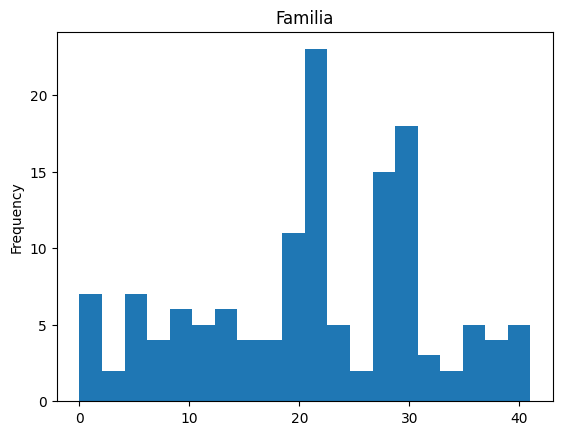

In [22]:
# @title Familia

from matplotlib import pyplot as plt
y['Familia'].plot(kind='hist', bins=20, title='Familia')
#plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [16]:
forest=RandomForestClassifier(random_state=42)
forest.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy en el conjunto de prueba: 0.5434782608695652
Recall en el conjunto de prueba: 0.5434782608695652
F1-score en el conjunto de prueba: 0.48242753623188406


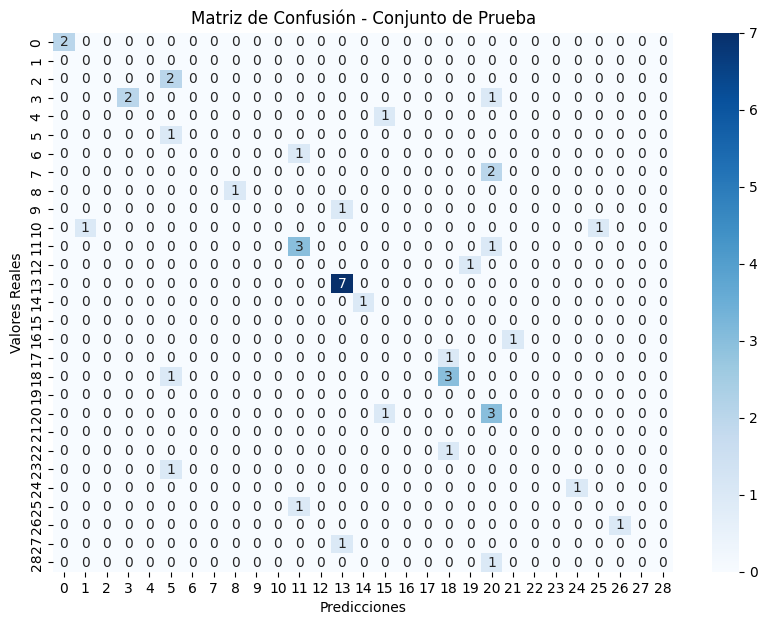

Accuracy en el conjunto de entrenamiento: 0.9891304347826086
Recall en el conjunto de entrenamiento: 0.9891304347826086
F1-score en el conjunto de entrenamiento: 0.9847826086956522


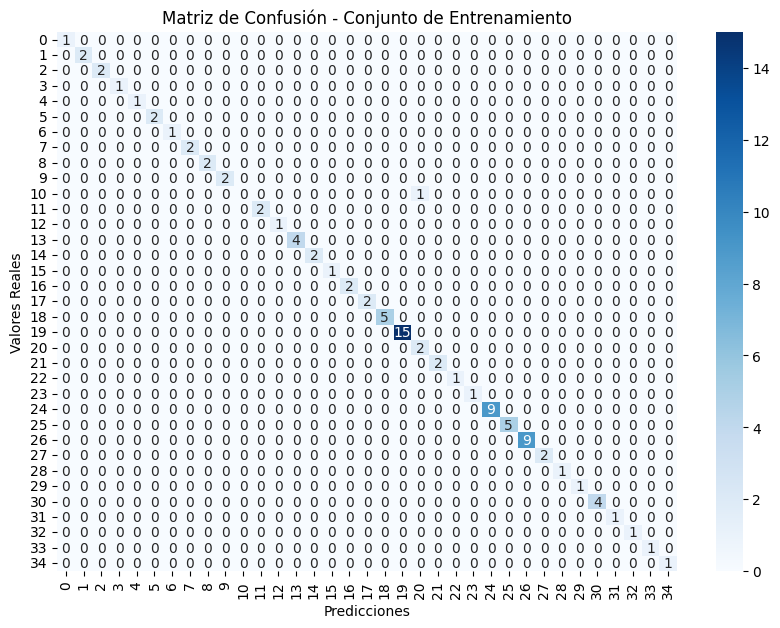

In [17]:


# Predicciones en el conjunto de prueba
y_pred_test = forest.predict(x_test)

# Calcular métricas para el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print(f"Accuracy en el conjunto de prueba: {accuracy_test}")
print(f"Recall en el conjunto de prueba: {recall_test}")
print(f"F1-score en el conjunto de prueba: {f1_test}")

# Matriz de confusión para el conjunto de prueba
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

# Predicciones en el conjunto de entrenamiento
y_pred_train = forest.predict(x_train)

# Calcular métricas para el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

print(f"Accuracy en el conjunto de entrenamiento: {accuracy_train}")
print(f"Recall en el conjunto de entrenamiento: {recall_train}")
print(f"F1-score en el conjunto de entrenamiento: {f1_train}")

# Matriz de confusión para el conjunto de entrenamiento
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Conjunto de Entrenamiento")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()


Escalar los datos


In [18]:
#Llamamos a nuestro objeto para escalar
scaler = StandardScaler()  #Asignamos la operación a un objeto
x_scaled = scaler.fit_transform(x) #Ajustamos y transformamos nuestros datos


In [19]:
x_scaled = pd.DataFrame(x_scaled, columns=['100_A.', '100_B.', '102_B.', '201_A.', '201_B.', '201_C.', '204_A.',
       '207_A.', '230_A.', '231_A.', '232_A.', '232_B.', '234_A.', '301_B.',
       '301_C.', '305_A.', '311_A.', '312_A.', '313_A.', '330_A.', '331_A.',
       '332_A.', '332_B.', '400_A.', '401_B.', '403_A.', '411_A.', '500_A.',
       '501_A.', '502_A.'])

ValueError: Shape of passed values is (138, 29), indices imply (138, 30)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=42)

In [ ]:
forest=RandomForestClassifier(random_state=42)
forest.fit(x_train,y_train)

In [ ]:

# Predicciones en el conjunto de prueba
y_pred_test = forest.predict(x_test)

# Calcular métricas para el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print(f"Accuracy en el conjunto de prueba: {accuracy_test}")
print(f"Recall en el conjunto de prueba: {recall_test}")
print(f"F1-score en el conjunto de prueba: {f1_test}")

# Matriz de confusión para el conjunto de prueba
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

# Predicciones en el conjunto de entrenamiento
y_pred_train = forest.predict(x_train)

# Calcular métricas para el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

print(f"Accuracy en el conjunto de entrenamiento: {accuracy_train}")
print(f"Recall en el conjunto de entrenamiento: {recall_train}")
print(f"F1-score en el conjunto de entrenamiento: {f1_train}")

# Matriz de confusión para el conjunto de entrenamiento
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Conjunto de Entrenamiento")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Inicializar el modelo PCA
pca = PCA()

# Ajustar PCA a los datos escalados
pca.fit(x_scaled)

# Calcular la varianza explicada acumulada
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Graficar la curva del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Curva del codo - Varianza explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

In [ ]:
#Creamos nuestro objeto llamando a la función

pca_2 = PCA(n_components=2) #Al momento de llamar nuestro objeto, le vamos a especificar cuantos componentes deseamos

#Ajustamos nuestro objeto de PCA
pca_2.fit(x_scaled)

In [ ]:
#Creamos nuestro objeto llamando a la función

pca = PCA(n_components=15) #Al momento de llamar nuestro objeto, le vamos a especificar cuantos componentes deseamos

#Ajustamos nuestro objeto de PCA
pca.fit(x_scaled)

In [ ]:
#Ahora vamos a transformar nuestros datos a la dimensión del PCA
x_pca_2 = pca_2.transform(x_scaled)
x_pca_2

#Ahora vamos a transformar nuestros datos a la dimensión del PCA
x_pca = pca.transform(x_scaled)
x_pca

In [ ]:
df_pca = pd.DataFrame(x_pca_2)
df_pca.columns = ["PC1", "PC2"]

#Y agregar las etiquetas
df_pca["Y"] = df["Familia"]

In [ ]:
print(df_pca)

In [ ]:
# Y lo podemos gráficar
sns.pairplot(df_pca, hue = "Y")
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.33, random_state=42)

In [ ]:
forest=RandomForestClassifier(random_state=42)
forest.fit(x_train,y_train)

In [ ]:

# Predicciones en el conjunto de prueba
y_pred_test = forest.predict(x_test)

# Calcular métricas para el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print(f"Accuracy en el conjunto de prueba: {accuracy_test}")
print(f"Recall en el conjunto de prueba: {recall_test}")
print(f"F1-score en el conjunto de prueba: {f1_test}")

# Matriz de confusión para el conjunto de prueba
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

# Predicciones en el conjunto de entrenamiento
y_pred_train = forest.predict(x_train)

# Calcular métricas para el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

print(f"Accuracy en el conjunto de entrenamiento: {accuracy_train}")
print(f"Recall en el conjunto de entrenamiento: {recall_train}")
print(f"F1-score en el conjunto de entrenamiento: {f1_train}")

# Matriz de confusión para el conjunto de entrenamiento
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Conjunto de Entrenamiento")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()